In [3]:
# Import main libraries 
import tensorflow as tf
import numpy as np
from tensorflow import keras
from tensorflow.keras.datasets import cifar100
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG19
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras import regularizers, optimizers

In [4]:
# load cifar dataset that contains 100 classes with 600 images each
(train_data,train_label), (test_data,test_label) = cifar100.load_data()

# train_data = train_data / 255.0
test_data = test_data / 255.0

# One hot encode labels
class_num = len(np.unique(train_label))
train_label = keras.utils.to_categorical(train_label,class_num)
test_label = keras.utils.to_categorical(test_label,class_num)

In [5]:
# Data augmentation to avoid overfitting

data_gen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.25,
    height_shift_range=0.0,
    shear_range=0.25,
    zoom_range=0.25,
    horizontal_flip = True,
    fill_mode='nearest'
)

data_gen.fit(train_data)

In [6]:
# Load VGG19 as feature extractor approach

base_model = VGG19(include_top = False, weights='imagenet',input_shape=(32,32,3))

# If you uncomment this two lines you can use VGG19 as fine tuning approach
# for layer in base_model.layers[:-8]:
#   layer.trainable = False

last_layer = base_model.get_layer('block5_pool')
last_output = last_layer.output

x = Flatten() (last_output)
# x = Dense(128,activation='relu') (x)
# x = Dropout(0.3) (x)
x = Dense(64,activation='relu') (x)
x = Dense(100,activation='softmax') (x)

new_model = Model(inputs=base_model.input,outputs=x)
new_model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
# new_model.summary()

In [7]:
# Callback for monitoring evaluation metrics and early stopping

from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
es = EarlyStopping(
     monitor='val_loss',
     min_delta=1,
     patience=20,
     verbose=1,
     mode='auto',
)
check_point = ModelCheckpoint(
      'model.{epoch:02d}-{val_loss:.2f}.h5',
      monitor='val_loss',
      verbose=1,
      save_best_only=True,  
      mode='auto'
)

In [8]:
histoty = new_model.fit(data_gen.flow(train_data,train_label, batch_size=250),epochs=100, validation_data=(test_data, test_label), verbose=1,  callbacks=[check_point, es])

Epoch 1/100
200/200 [==============================] - 67s 158ms/step - loss: 4.6898 - acc: 0.0098 - val_loss: 4.6052 - val_acc: 0.0100

Epoch 00001: val_loss improved from inf to 4.60518, saving model to model.01-4.61.h5
Epoch 2/100
200/200 [==============================] - 31s 154ms/step - loss: 4.6054 - acc: 0.0083 - val_loss: 4.6052 - val_acc: 0.0100

Epoch 00002: val_loss improved from 4.60518 to 4.60518, saving model to model.02-4.61.h5
Epoch 3/100
200/200 [==============================] - 31s 154ms/step - loss: 4.6054 - acc: 0.0086 - val_loss: 4.6052 - val_acc: 0.0100

Epoch 00003: val_loss improved from 4.60518 to 4.60518, saving model to model.03-4.61.h5
Epoch 4/100
200/200 [==============================] - 31s 153ms/step - loss: 4.6055 - acc: 0.0094 - val_loss: 4.6052 - val_acc: 0.0100

Epoch 00004: val_loss improved from 4.60518 to 4.60517, saving model to model.04-4.61.h5
Epoch 5/100
200/200 [==============================] - 31s 153ms/step - loss: 4.6055 - acc: 0.0093 -

In [ ]:
# Create Custom network

base_hidden_units = 32
weight_decay = 1e-4
model = keras.models.Sequential()
     
model.add(Conv2D(32, 3,activation='relu',padding='same',kernel_regularizer=regularizers.l2(weight_decay),input_shape=train_data.shape[1:]))
model.add(BatchNormalization())

model.add(Conv2D(32, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())

model.add(Conv2D(64, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())    

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3)) 

model.add(Conv2D(128, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay)))
model.add(BatchNormalization())

model.add(Conv2D(128, 3, activation='relu', padding='same', kernel_regularizer=regularizers.l2(weight_decay))),
model.add(BatchNormalization()), 

model.add(MaxPooling2D(pool_size=(2,2))),
model.add(Dropout(0.4)),

model.add(Flatten()),
# model.add(Dense(64, activation='relu')),
model.add(Dense(32, activation='relu')),
model.add(Dense(100, activation='softmax')),
# model.summary() 
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])                  

In [ ]:
history1 = model.fit(data_gen.flow(train_data, train_label, batch_size=250), batch_size=250, epochs=100, validation_data=(test_data, test_label), verbose=1, callbacks=[check_point])

Epoch 1/100
200/200 [==============================] - 25s 120ms/step - loss: 4.5594 - accuracy: 0.0271 - val_loss: 4.5992 - val_accuracy: 0.0169

Epoch 00001: val_loss improved from 4.60517 to 4.59920, saving model to model.01-4.60.h5
Epoch 2/100
200/200 [==============================] - 23s 117ms/step - loss: 4.1096 - accuracy: 0.0757 - val_loss: 4.5993 - val_accuracy: 0.0429

Epoch 00002: val_loss did not improve from 4.59920
Epoch 3/100
200/200 [==============================] - 24s 119ms/step - loss: 3.7042 - accuracy: 0.1248 - val_loss: 3.5704 - val_accuracy: 0.1523

Epoch 00003: val_loss improved from 4.59920 to 3.57039, saving model to model.03-3.57.h5
Epoch 4/100
200/200 [==============================] - 24s 118ms/step - loss: 3.4839 - accuracy: 0.1659 - val_loss: 3.3650 - val_accuracy: 0.1993

Epoch 00004: val_loss improved from 3.57039 to 3.36503, saving model to model.04-3.37.h5
Epoch 5/100
200/200 [==============================] - 23s 117ms/step - loss: 3.3037 - accurac

Text(0.5, 1.0, 'Training and validation loss')

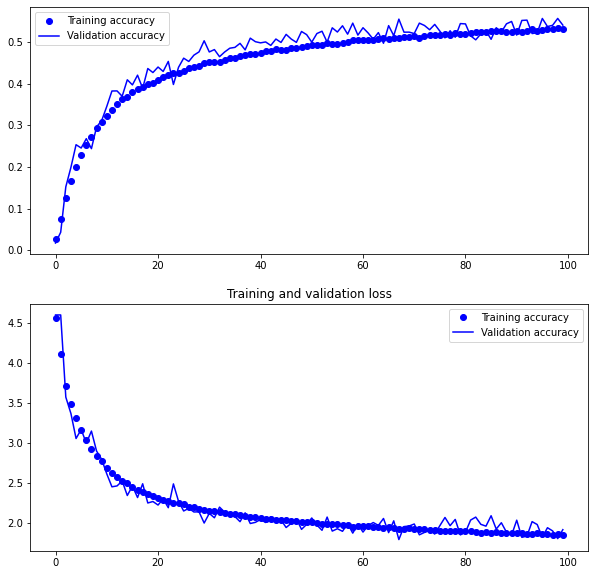

In [43]:
# plotting accuaracy and loss of custom network  
from matplotlib import pyplot as plt

vgg_acc = history1.history['accuracy']
vgg_loss = history1.history['loss']
vgg_val_acc = history1.history['val_accuracy']
vgg_val_loss = history1.history['val_loss']
epochs = range(len(vgg_acc))

fig, (ax1, ax2) =  plt.subplots(2)
fig.set_figheight(10)
fig.set_figwidth(10)

ax1.plot(epochs, vgg_acc, 'bo',label='Training accuracy')
ax1.plot(epochs, vgg_val_acc,'b', label='Validation accuracy')
ax1.legend()
plt.title('Training and validation accuracy')

ax2.plot(epochs, vgg_loss, 'bo',label='Training accuracy')
ax2.plot(epochs, vgg_val_loss,'b', label='Validation accuracy')
ax2.legend()
plt.title('Training and validation loss')